In [ ]:
!pip install datasets torch
!pip install accelerate -U
!pip install transformers -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 14.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Orginal Model

In [ ]:
from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

prompt1 = 'To be or not to be'
prompt2 = 'A horse! a horse! my kingdom for a horse!'

input_ids1 = tokenizer.encode(prompt1, return_tensors="pt", max_length=50, truncation=True).to(device)
attention_mask1 = torch.ones_like(input_ids1).to(device)  # Setting attention mask to 1 for all tokens

input_ids2 = tokenizer.encode(prompt2, return_tensors="pt", max_length=100, truncation=True).to(device)
attention_mask2 = torch.ones_like(input_ids2).to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

In [ ]:
from transformers import GPT2LMHeadModel
model = GPT2LMHeadModel.from_pretrained("gpt2").to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
output1 = model.generate(input_ids1, max_length=150, num_return_sequences=1, attention_mask=attention_mask1)
output2 = model.generate(input_ids2, max_length=150, num_return_sequences=1, attention_mask=attention_mask2)

generated_text1 = tokenizer.decode(output1[0], skip_special_tokens=True)
generated_text2 = tokenizer.decode(output2[0], skip_special_tokens=True)

print("Generated text for prompt 1:", generated_text1)
print("Generated text for prompt 2:", generated_text2)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated text for prompt 1: To be or not to be, the only thing that matters is that you're a good person.

I'm not saying that you should be a good person. I'm saying that you should be a good person.

I'm not saying that you should be a good person. I'm saying that you should be a good person.

I'm not saying that you should be a good person. I'm saying that you should be a good person.

I'm not saying that you should be a good person. I'm saying that you should be a good person.

I'm not saying that you should be a good person. I'm saying that you should be a good person.

I'm not
Generated text for prompt 2: A horse! a horse! my kingdom for a horse! a horse! my kingdom for a horse! a horse! my kingdom for a horse! a horse! my kingdom for a horse! a horse! my kingdom for a horse! a horse! my kingdom for a horse! a horse! my kingdom for a horse! a horse! my kingdom for a horse! a horse! my kingdom for a horse! a horse! my kingdom for a horse! a horse! my kingdom for a horse! a horse!

In [ ]:
from datasets import load_dataset
dataset = load_dataset("tiny_shakespeare")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for tiny_shakespeare contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/tiny_shakespeare
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/1 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1 [00:00<?, ? examples/s]

In [ ]:
model.resize_token_embeddings(len(tokenizer))

Embedding(50257, 768)

# Using the fine-tuned model for 10 epochs.

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./10 epochs',
    learning_rate=0.001,
    num_train_epochs=10,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_strategy="steps",
    logging_steps=1,
    logging_dir='./logs',
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

In [ ]:
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token


dataset = load_dataset("tiny_shakespeare")


def tokenize_function(examples):
    # Tokenize the inputs and labels
    return tokenizer(examples['text'], max_length=512, truncation=True, padding="max_length")


tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=dataset['train'].column_names)

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for tiny_shakespeare contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/tiny_shakespeare
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,
)

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
    data_collator=data_collator,
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,4.249500,3.979210
2,4.276900,3.933247
3,4.265000,3.839862
4,4.285600,3.712538
5,4.164600,3.585396
6,4.024600,3.471714
7,4.019200,3.409395
8,3.879800,3.386909
9,3.709000,3.397023
10,3.665100,3.405814


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


TrainOutput(global_step=10, training_loss=4.053926849365235, metrics={'train_runtime': 48.6756, 'train_samples_per_second': 0.205, 'train_steps_per_second': 0.205, 'total_flos': 2612920320000.0, 'train_loss': 4.053926849365235, 'epoch': 10.0})

In [ ]:
trainer.save_model('./10 epochs')
tokenizer.save_pretrained('./10 epochs')

('./10 epochs/tokenizer_config.json',
 './10 epochs/special_tokens_map.json',
 './10 epochs/vocab.json',
 './10 epochs/merges.txt',
 './10 epochs/added_tokens.json')

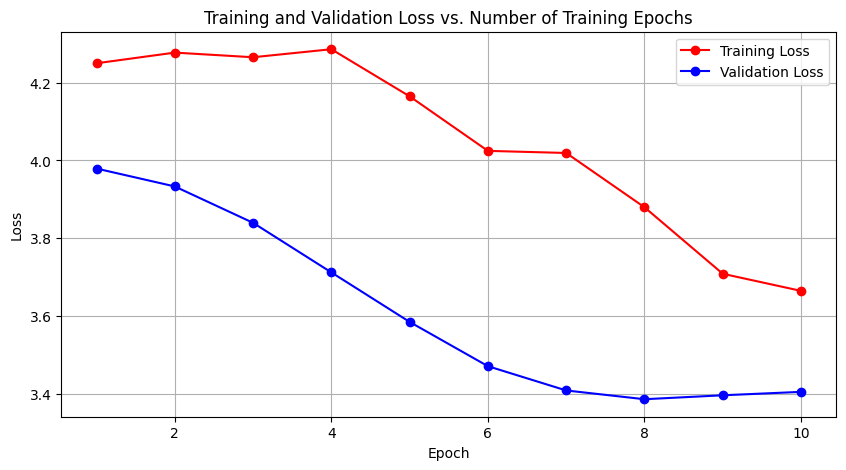

In [ ]:
import matplotlib.pyplot as plt


training_losses = []
validation_losses = []
epochs_train = []
epochs_val = []

for log in trainer.state.log_history:
    if 'loss' in log and 'epoch' in log:
        training_losses.append(log['loss'])
        epochs_train.append(log['epoch'])
    if 'eval_loss' in log:
        validation_losses.append(log['eval_loss'])
        epochs_val.append(log['epoch'])


plt.figure(figsize=(10, 5))
plt.plot(epochs_train, training_losses, marker='o', linestyle='-', color='r', label='Training Loss')
plt.plot(epochs_val, validation_losses, marker='o', linestyle='-', color='b', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Number of Training Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel


fine_tuned_model = GPT2LMHeadModel.from_pretrained('./10 epochs').to(device)
tokenizer = GPT2Tokenizer.from_pretrained('./10 epochs')


prompt = "A horse! A horse! my kingdom for a horse!"


input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)
attention_mask = torch.ones_like(input_ids).to(device)


output = fine_tuned_model.generate(
    input_ids,
    max_length=150,
    num_return_sequences=1,
    attention_mask=attention_mask,
    pad_token_id=tokenizer.eos_token_id,
    no_repeat_ngram_size=2,
    repetition_penalty=1.5
)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated text:", generated_text)

Generated text: A horse! A horse! my kingdom for a horse!
The king of the world, who was not yet born. The King's son and heir to his throne; he had been called by many names in this country: "the prince," said I when we were at home with him on our way back from France—"a man whose name is Prince Charles." He looked up into heaven as if it might be seen through some kind of veil that would reveal himself only after death or even before birth (for there are no such things). And then came all these words which have come down upon us now about what happened during those days? What did they say concerning me afterwards?" Then answered Lord Henry II., saying unto them thus :—"


# Using the fine-tuned model for 30 epochs.

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./30 epochs',
    num_train_epochs=30,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    learning_rate=0.001,
    logging_strategy="steps",
    logging_steps=1,
    logging_dir='./logs',
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,

)

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
    data_collator=data_collator,
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,3.739200,3.386909
2,3.616900,3.385004
3,3.670600,3.382700
4,3.614300,3.379786
5,3.707300,3.376168
6,3.657200,3.371663
7,3.599700,3.364712
8,3.584500,3.359511
9,3.448300,3.358362
10,3.376100,3.359368


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


TrainOutput(global_step=30, training_loss=2.7415939569473267, metrics={'train_runtime': 143.9796, 'train_samples_per_second': 0.208, 'train_steps_per_second': 0.208, 'total_flos': 7838760960000.0, 'train_loss': 2.7415939569473267, 'epoch': 30.0})

In [ ]:
trainer.save_model('./30 epochs')
tokenizer.save_pretrained('./30 epochs')

('./30 epochs/tokenizer_config.json',
 './30 epochs/special_tokens_map.json',
 './30 epochs/vocab.json',
 './30 epochs/merges.txt',
 './30 epochs/added_tokens.json')

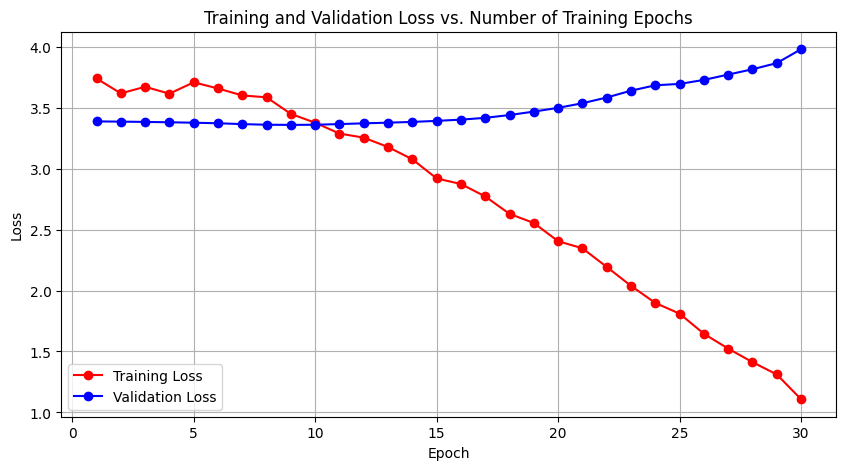

In [ ]:



training_losses = []
validation_losses = []
epochs_train = []
epochs_val = []

for log in trainer.state.log_history:
    if 'loss' in log and 'epoch' in log:
        training_losses.append(log['loss'])
        epochs_train.append(log['epoch'])
    if 'eval_loss' in log:
        validation_losses.append(log['eval_loss'])
        epochs_val.append(log['epoch'])


plt.figure(figsize=(10, 5))
plt.plot(epochs_train, training_losses, marker='o', linestyle='-', color='r', label='Training Loss')
plt.plot(epochs_val, validation_losses, marker='o', linestyle='-', color='b', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Number of Training Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel


fine_tuned_model = GPT2LMHeadModel.from_pretrained('./30 epochs').to(device)
tokenizer = GPT2Tokenizer.from_pretrained('./30 epochs')


prompt = "A horse! A horse! my kingdom for a horse!"


input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)
attention_mask = torch.ones_like(input_ids).to(device)


output = fine_tuned_model.generate(
    input_ids,
    max_length=150,
    num_return_sequences=1,
    attention_mask=attention_mask,
    pad_token_id=tokenizer.eos_token_id,
    no_repeat_ngram_size=2,
    repetition_penalty=1.5
)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated text:", generated_text)

Generated text: A horse! A horse! my kingdom for a horse!
The king of the world, who was not afraid to speak his mind. He said: "I will give you this sword and I shall take it from thee." And he took away all that had been taken by him; but when they saw what were in them thereupon their hearts became filled with joy at seeing such an evil thing as these things did happen unto me—and so went on till death came upon us again.—And now we are come into our own country where men have no fear or respect towards one another except those whom God has given grace over themselves (for if any man should be able) then let none know how much more than himself can do good through faith


# Hyperparameter Tuning

In [ ]:
from transformers import TrainingArguments

training_args_hyperparameter_tuning = TrainingArguments(
    output_dir='./Hyperparameter_Tuning',
    num_train_epochs=30,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    warmup_steps=200,
    learning_rate=5e-5,
    weight_decay=0.01,
    adam_epsilon=1e-8,
    max_steps=30,
    fp16=True,  # Enabling mixed precision training
    logging_strategy="steps",
    logging_steps=1,
    logging_dir='./logs_hyperparameter_tuning',
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)



    #fp16=True,
    # Add other parameters below as needed
    #gradient_clip_value=1.0,
    #learning_rate_scheduler="polynomial_decay",
    #early_stopping_patience=3,
    #dropout=0.1,
    #model_name_or_path="gpt2",
    #data_augmentation=True,
    #custom_metrics=["accuracy"],









# training_args = TrainingArguments(
#     output_dir='./Hyperparameter_Tuning',
#     num_train_epochs=30,
#     per_device_train_batch_size=4,
#     per_device_eval_batch_size=4,
#     warmup_steps=200,
#     learning_rate=3e-5,
#     weight_decay=0.01,
#     warmup_ratio=0.1,
#     # save_steps=10,
#     # eval_steps=10,
#     adam_epsilon=5e-8,
#     max_steps=30,
#     max_grad_norm=10,
#     gradient_accumulation_steps=4,

      #p16=True,
#     fp16_opt_level="O1",
#     #gradient_checkpointing=True,
#     logging_strategy="steps",
#     logging_steps=1,
#     logging_dir='./logs',
#     evaluation_strategy="epoch",
#     save_strategy="epoch",
#     load_best_model_at_end=True,
# )


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
    data_collator=data_collator,
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,3.364200,3.358994
2,3.251300,3.358994
3,3.256400,3.358994
4,3.255900,3.358994
5,3.344300,3.358348
6,3.347800,3.358451
7,3.314900,3.357196
8,3.367600,3.358997
9,3.282700,3.359925
10,3.246300,3.362352


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


TrainOutput(global_step=30, training_loss=2.6682804862658185, metrics={'train_runtime': 148.7504, 'train_samples_per_second': 0.202, 'train_steps_per_second': 0.202, 'total_flos': 7838760960000.0, 'train_loss': 2.6682804862658185, 'epoch': 30.0})

In [ ]:
 trainer.save_model('./Hyperparameter_Tuning')
 tokenizer.save_pretrained('./Hyperparameter_Tuning')

('./Hyperparameter_Tuning/tokenizer_config.json',
 './Hyperparameter_Tuning/special_tokens_map.json',
 './Hyperparameter_Tuning/vocab.json',
 './Hyperparameter_Tuning/merges.txt',
 './Hyperparameter_Tuning/added_tokens.json')

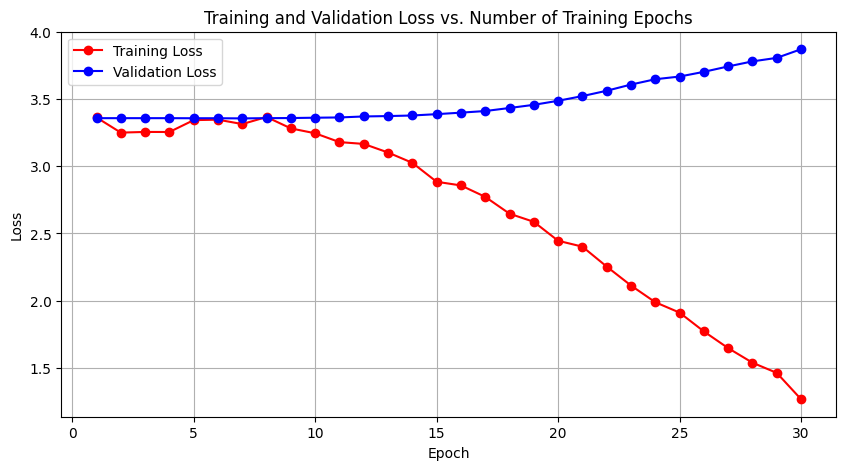

In [ ]:



training_losses = []
validation_losses = []
epochs_train = []
epochs_val = []

for log in trainer.state.log_history:
    if 'loss' in log and 'epoch' in log:
        training_losses.append(log['loss'])
        epochs_train.append(log['epoch'])
    if 'eval_loss' in log:
        validation_losses.append(log['eval_loss'])
        epochs_val.append(log['epoch'])


plt.figure(figsize=(10, 5))
plt.plot(epochs_train, training_losses, marker='o', linestyle='-', color='r', label='Training Loss')
plt.plot(epochs_val, validation_losses, marker='o', linestyle='-', color='b', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Number of Training Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

model.save_pretrained('/content/drive/MyDrive/Hyperparameter_Tuning')

model2 = GPT2LMHeadModel.from_pretrained('/content/drive/MyDrive/Hyperparameter_Tuning').to(device)

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel


fine_tuned_model = GPT2LMHeadModel.from_pretrained('./Hyperparameter_Tuning').to(device)
tokenizer = GPT2Tokenizer.from_pretrained('./Hyperparameter_Tuning')


prompt = "A horse! A horse! my kingdom for a horse!"


input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)
attention_mask = torch.ones_like(input_ids).to(device)


output = fine_tuned_model.generate(
    input_ids,
    max_length=150,
    num_return_sequences=1,
    attention_mask=attention_mask,
    pad_token_id=tokenizer.eos_token_id,
    no_repeat_ngram_size=2,
    repetition_penalty=1.5
)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated text:", generated_text)

Generated text: A horse! A horse! my kingdom for a horse!
The king of the world, who was in his own country and had been sent to fight against him. He said: "I will not be able with you; I am afraid that if we do this then he shall come after me." And when they saw what happened between them there came forth an army which went out from their camp into Jerusalem where it attacked one another but did nothing else except kill all those men whom God gave mercy on before Him (Psalm 24). The people were astonished at these things because no man could have known how many horses would perish without being killed by such slaughtering as is done among us today or even amongst our enemies' wives during war time.
